<h1 style="background-color: #F1F8FF; font-family: Times New Roman; font-size: 250%; color: #FF69B4; border-radius: 80px 20px; padding: 25px; text-align: center;">
  <b>Extracting Cosmetic Ingredients Using OCR</b>
</h1>

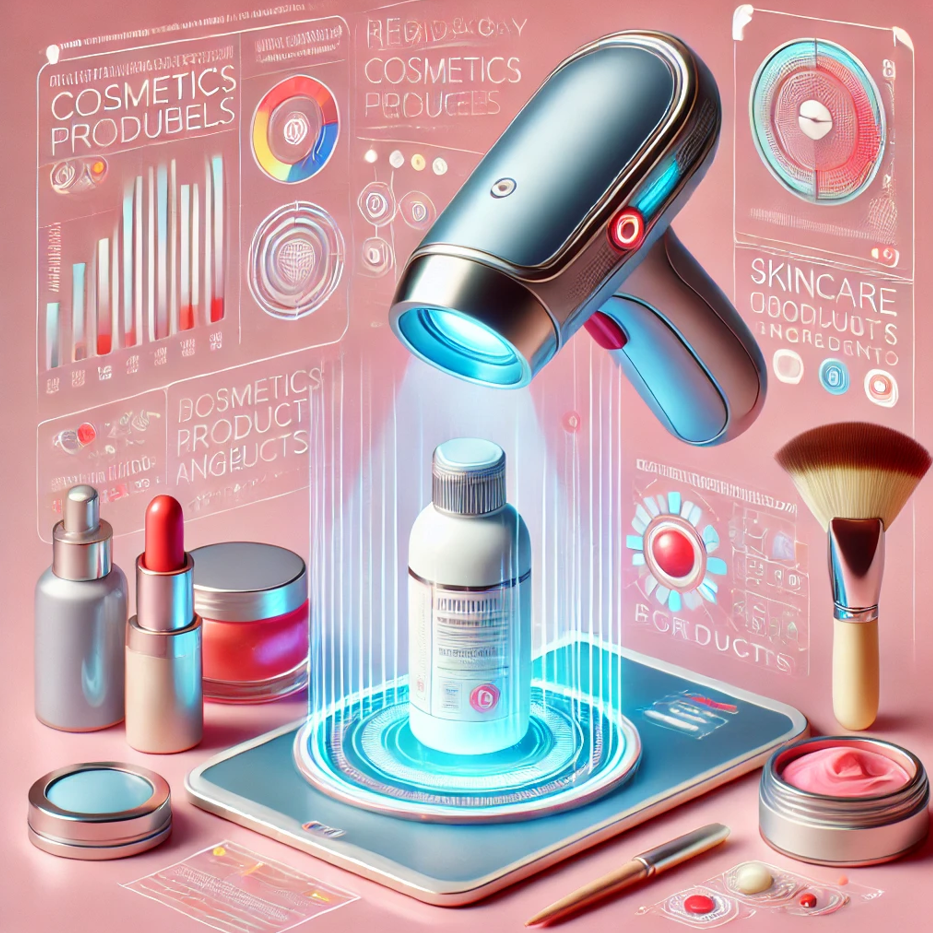

<h1 style="color: #FF69B4; text-align: center;">
  <b>Introduction</b>
</h1>

**Extracting Cosmetic Product Ingredients Using OCR Technology**

With the rise of machine learning and advanced image processing techniques, Optical Character Recognition (OCR) has become a key technology for extracting textual data from images. This project leverages OCR to extract and analyze ingredient lists from cosmetic product labels, addressing a real-world need for transparency and accessibility in product information.

The goal is to develop a tool that allows consumers to quickly scan the labels of cosmetic products, identify their contents, and evaluate whether they include any harmful or allergenic ingredients. By simplifying the process of reviewing product labels, this solution empowers individuals to make more informed and health-conscious decisions.

In this project, multiple OCR libraries and frameworks—including PyTesseract, EasyOCR, and PaddleOCR—are utilized to compare their performance and effectiveness. This multi-faceted approach ensures comprehensive analysis and highlights the strengths and limitations of each tool in extracting text from complex product labels.

Our approach involves capturing an image of a product label and processing it through a series of stages, from pre-processing the image to accurately extracting and interpreting the text. This project integrates the domains of computer vision and natural language processing, exemplifying the application of technology to create meaningful solutions for everyday challenges.


<h1 style="color: #FF69B4; text-align: center;">
  <b>Import Libraries</b>
</h1>

In [1]:
# Libraries for image processing and data loading
import os                # For handling file paths and directories
import cv2               # OpenCV - for image processing (reading, resizing, and processing images)
import numpy as np       # NumPy - for mathematical operations on arrays and matrices
import matplotlib.pyplot as plt  # For visualizing images and data in a graphical format
import pandas as pd      # Pandas - for data manipulation and analysis (e.g., creating and analyzing data frames)
from PIL import Image    # PIL - for image file reading and advanced image manipulation

# Libraries for OCR (Optical Character Recognition)
import pytesseract       # Tesseract OCR library for text extraction from images
from pytesseract import Output  # To get OCR results in dictionary format with detailed information
import easyocr           # EasyOCR - alternative OCR library supporting multiple languages

# Libraries for data analysis and cleaning
import re                # Regular expressions - for cleaning and matching patterns in text
import json              # For parsing and storing data in JSON format (structured data storage)

<h1 style="color: #FF69B4; text-align: center;">
  <b>Image Preprocessing</b>
</h1>

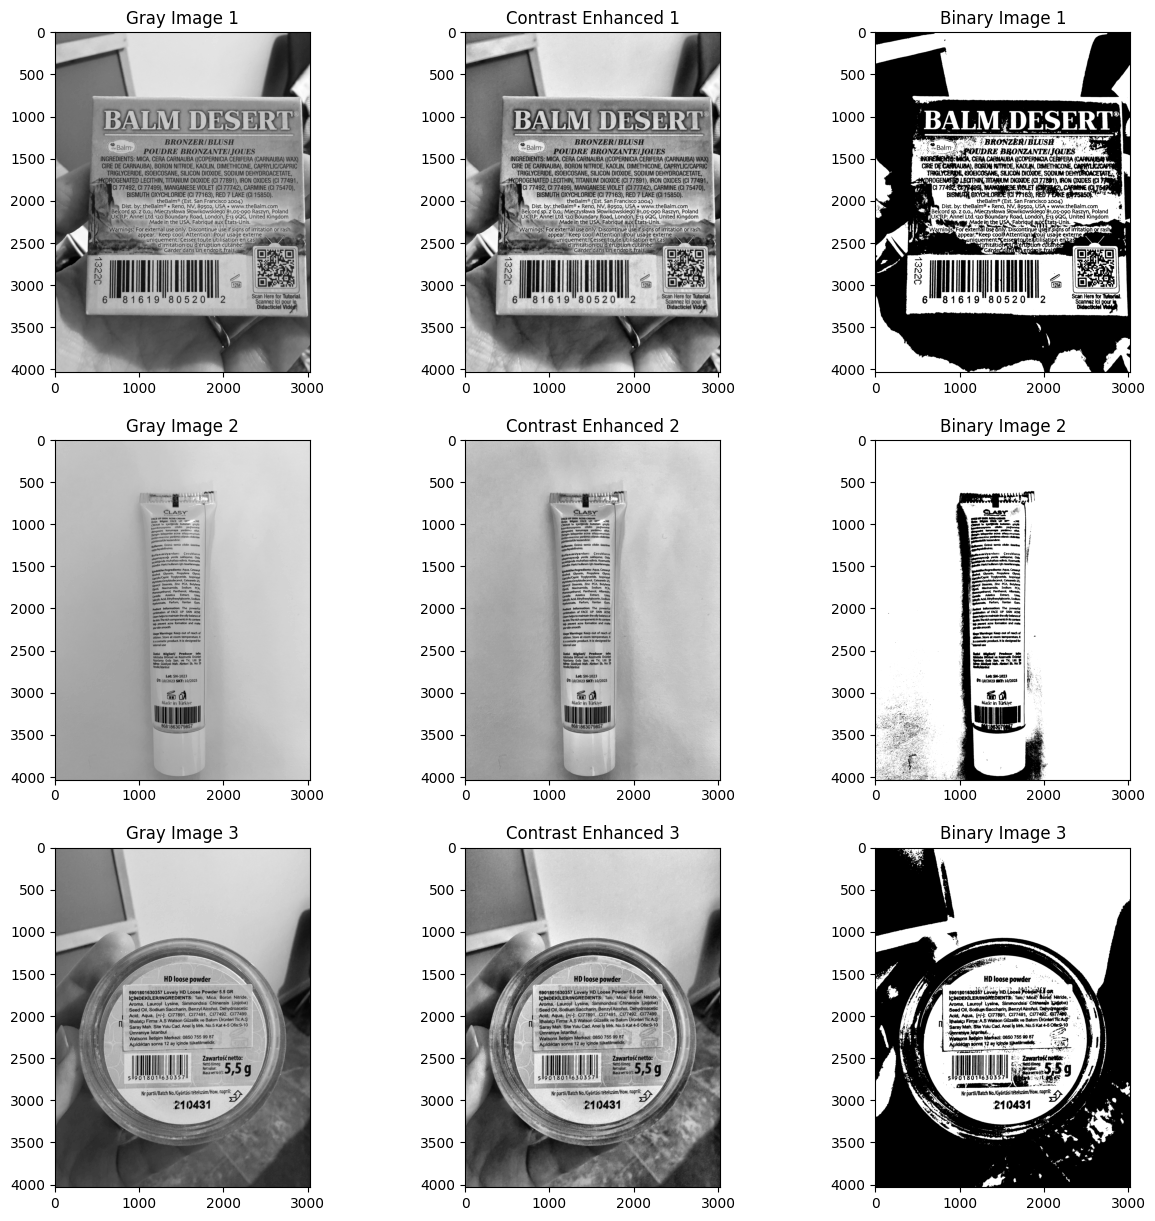

In [2]:
image1 = cv2.imread('/kaggle/input/ingredients/IMG_5961.jpeg')
image2 = cv2.imread('/kaggle/input/ingredients/image21.jpeg')
image3 = cv2.imread('/kaggle/input/ingredients/IMG_5963.jpeg')

def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    contrast_enhanced = clahe.apply(gray)
    _, binary_image = cv2.threshold(contrast_enhanced, 150, 255, cv2.THRESH_BINARY)
    return gray, contrast_enhanced, binary_image

gray1, contrast1, binary1 = preprocess_image(image1)
gray2, contrast2, binary2 = preprocess_image(image2)
gray3, contrast3, binary3 = preprocess_image(image3)

plt.figure(figsize=(15, 15))

plt.subplot(3, 3, 1), plt.imshow(gray1, cmap='gray'), plt.title('Gray Image 1')
plt.subplot(3, 3, 2), plt.imshow(contrast1, cmap='gray'), plt.title('Contrast Enhanced 1')
plt.subplot(3, 3, 3), plt.imshow(binary1, cmap='gray'), plt.title('Binary Image 1')

plt.subplot(3, 3, 4), plt.imshow(gray2, cmap='gray'), plt.title('Gray Image 2')
plt.subplot(3, 3, 5), plt.imshow(contrast2, cmap='gray'), plt.title('Contrast Enhanced 2')
plt.subplot(3, 3, 6), plt.imshow(binary2, cmap='gray'), plt.title('Binary Image 2')

plt.subplot(3, 3, 7), plt.imshow(gray3, cmap='gray'), plt.title('Gray Image 3')
plt.subplot(3, 3, 8), plt.imshow(contrast3, cmap='gray'), plt.title('Contrast Enhanced 3')
plt.subplot(3, 3, 9), plt.imshow(binary3, cmap='gray'), plt.title('Binary Image 3')

plt.show()

We are processing the image to make it more suitable for OCR. The steps we are performing:

1. **Gaussian Blur (Noise Reduction):**
   - Reducing noise (extra pixels) in the image to obtain cleaner text. This step helps improve the accuracy of text recognition.

2. **Histogram Equalization (Contrast Enhancement):**
   - Enhancing the contrast of the image to make the difference between the text and the background more pronounced. This helps OCR in correctly recognizing the text.

3. **Thresholding (Binarization):**
   - Converting the image to black and white. This step ensures that the text is clearly separated from the background, making it easier for OCR to read the text.

<h1 style="color: #FF69B4; text-align: center;">
  <b>OCR Implementation</b>
</h1>

<h2 style="color: #FF1493; text-align: center;">
  <b>Pytesseract</b>
</h2>

Ingredients Section:
: AQUA/WATER/EAU * DICAPRYLYL CARBONATE «
GLYCERIN * PENTYLENE GLYCOL * UNDECANE * DIMETHICONE * ISODODECANE * STEARYL
HEPTANOATE * MICA * PEG-30 DIPOLYHYDROXYSTEARATE + POLYMETHYLSILSESQUIOXANE
* MAGNESIUM SULFATE * SORBITAN ISOSTEARATE * STEARALKONIUM BENTONITE © VP/
HEXADECENE COPOLYMER * TRIDECANE » LECITHIN * APHLOIA THEIFORMIS LEAF EXTRACT
* MARIS AQUA/SEA WATER/EAU DE MER * STEARYL CAPRYLATE » METHYL METHACRYLATE
CROSSPOLYMER * BETAINE * TRISILOXANE + HYDROXYACETOPHENONE * HYDROGENATED
LECITHIN * VP/EICOSENE COPOLYMER » ETHYLHEXYLGLYCERIN * DISTEARDIMONIUM HECTO-
RITE * XANTHAN GUM » DIMETHICONE CROSSPOLYMER * PHENETHYL ALCOHOL * TOCOPHERYL
ACETATE » PROPYLENE CARBONATE » TROPAEOLUM MAJUS FLOWER/LEAF/STEM EXTRACT «
TETRASELMIS SUECICA EXTRACT » SILICA. » TIN OXIDE + 1,2-HEXANEDIOL » CAPRYLYL GLYCOL «
TOCOPHEROL » ALUMINA * MAGNESIUM OXIDE * HYDROCHLORIC ACID * POTASSIUM SORBATE
» [+/- (MAY CONTAIN/PEUT


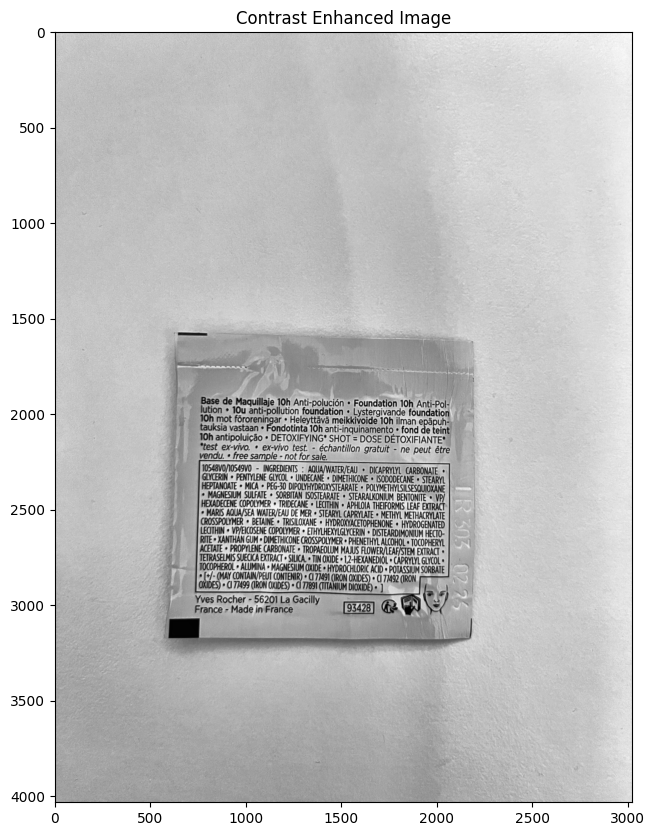

In [3]:
image = cv2.imread('/kaggle/input/ingredients/image3.jpeg')

# Apply Gaussian Blur to reduce noise and improve OCR performance
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Convert the image to grayscale for further processing
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to enhance contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
contrast_enhanced = clahe.apply(gray)

# Use pytesseract to extract text from the contrast-enhanced image
text = pytesseract.image_to_string(contrast_enhanced)

# Search for the start index of the 'Ingredients' section in the OCR-extracted text
start_idx = text.lower().find('ingredients')  

# Extract the text after the 'Ingredients' keyword if it exists
if start_idx != -1:
    extracted_text = text[start_idx + len('ingredients'):].strip()
    
    # Look for the first lowercase letter to terminate the ingredients text
    for i, char in enumerate(extracted_text):
        if char.islower():
            ingredients_text = extracted_text[:i].strip()
            break
    else:
        # If no lowercase character is found, take the whole extracted text
        ingredients_text = extracted_text  
else:
    # If 'Ingredients' keyword is not found, set a default message
    ingredients_text = "Ingredients section not found."

print("Ingredients Section:")
print(ingredients_text)

plt.figure(figsize=(10, 10))
plt.imshow(contrast_enhanced, cmap='gray')
plt.title("Contrast Enhanced Image")
plt.show()

Ingredients Section:
: Mica, Talc, Magnesium Stearate,
Paraffinum Liquidum, Ethylhexyl Palmitate, Aluminum
Starch Octenylsuccinate, Polybutene, Dimethicone,
Polyethylene, Methylparaben, Propylparaben, [+/-: .
Cl 77891, Cl 77491, Cl 777492, Cl 77499, Cl 77510,
Cl 77007, Cl 77742, Cl 15985, Cl 15850, Cl 16035)

I

5°057566"014496

 

CULLET DRIVE, QUEENBOROUGH, KENT; ME11.5JS UK Ee) ie
: ? ~ we ae eee a Se


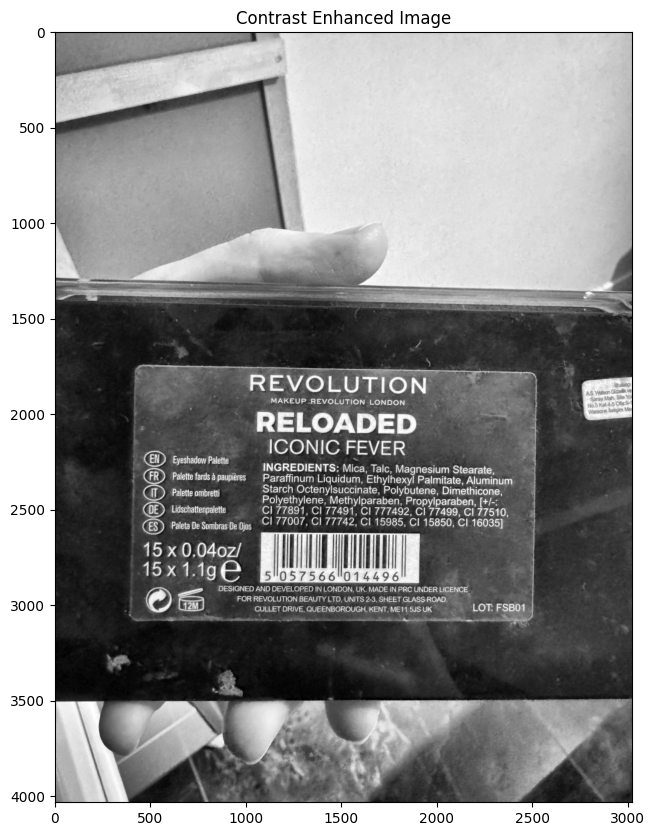

In [4]:
image = cv2.imread('/kaggle/input/ingredients/IMG_5962.jpeg')

blurred = cv2.GaussianBlur(image, (5, 5), 0)
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
contrast_enhanced = clahe.apply(gray)

text = pytesseract.image_to_string(contrast_enhanced)

start_idx = text.lower().find('ingredients')  
if start_idx != -1:
    ingredients_text = text[start_idx + len('ingredients'):].strip()
else:
    ingredients_text = "Ingredients section not found."

print("Ingredients Section:")
print(ingredients_text)

plt.figure(figsize=(10, 10))
plt.imshow(contrast_enhanced, cmap='gray')
plt.title("Contrast Enhanced Image")
plt.show()

### Why PyTesseract for OCR?
PyTesseract is a Python wrapper for the Tesseract-OCR Engine, making it an excellent tool for extracting textual information from images. Here's why it's a go-to choice:

1. Accuracy: PyTesseract leverages Tesseract’s robust capabilities to recognize text across multiple languages and complex layouts with impressive precision.

2. Simplicity: Its integration with Python provides an intuitive interface for rapid development.

3. Customization: It allows configurations to enhance performance, such as defining custom preprocessing steps or using specialized language models.

**Key Role in the Code**

In this project, PyTesseract is used to recognize and extract text from contrast-enhanced images, specifically targeting the "Ingredients" section on cosmetic product labels. It seamlessly bridges image data and readable, structured text for further processing.

<h2 style="color: #FF1493; text-align: center;">
  <b>Easyocr</b>
</h2>

In [5]:
#pip install easyocr

In [6]:
reader = easyocr.Reader(['tr', 'en'], gpu=True)

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


OCR Result:
: Aqua, Glycerin, Propylene Glycol, Tryglyceride   Isopropyl Octyldodecanol, Ceteareth-25, Stearate, Zinc PCA, Butylene Niacinamide; Sodium PCA, Panthenol, Allantoin; Asiatica Extract Acid, Ethylhexylglycerin, Sodium Hyaluronate, Parfum, Xantan Gum. Product   Information: The powerful cmbination of FACE UP SKIN ACNE Geamhelps to maintain the oily balanceof teskn Therich components in its content help prevent acne formation and make ypsknsmooth Usage Warnings: Keep out of reach of dildren. Store at room temperature. It isacosmetic product. It is designed for erternal use Bilgileri/ Producer Info; Halızbaba Bitkisel ve Kozmetik Urünleri Pazarlama Gıda San. ve Tic. Ltd. Şti Adres; Guzelyalı Mah. Alınteri Sk No: 20 Pendik (stanbul Lot: SN-1023 UT: 10/2023 SKT; 10/2025 Made in Iürkiye 8681863079857 CREAM dengesini onlenmesine p5rüzsüzlük üzerine Kullanım: uygulayabilirsiniz ulaşamayacağı scaklığında ]kndur Cetearyl Akcohol CaprylicCapric Myristate; Glyceryl Glycol Fhenoxyethanol

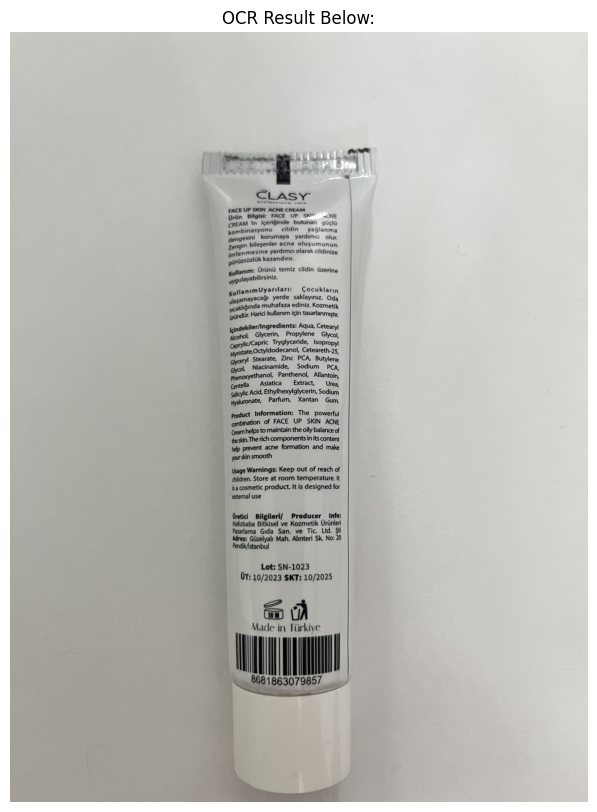

In [7]:
img = cv2.imread('/kaggle/input/ingredients/image21.jpeg')

#Convert the image to RGB (EasyOCR works with RGB images)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Use EasyOCR to extract text from the image
result = reader.readtext(img_rgb)

# Extract the text from the 'Ingredients' section if it exists
text = ' '.join([res[1] for res in result])  

start_idx = text.lower().find('ingredients')  # Look for the word 'ingredients'
if start_idx != -1:
    ingredients_text = text[start_idx + len('ingredients'):].strip()  
else:
    ingredients_text = "Ingredients section not found."

# Print the OCR result
print("OCR Result:")
print(ingredients_text)

plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('OCR Result Below:')
plt.xlabel(ingredients_text, fontsize=12, color='red', labelpad=10)  
plt.show()

OCR Result:
ingredients: talc; mica, boron nitride aroma lauroyl   lysine, simmondsia chinensis   (jojoba) seed oil, sodium saccharin, benzyl alcohol; dehydroacetic acid, aqua, [+i-]: ci77891, ci77491, ci77492, ci77499. ithalatçı firma: a.s watson güzellik ve bakım ürünleri tic a$ saray mah: site yolu cad. anel lş mrk. no.5 kat 4-5 ofis;9-10 ümraniye istanbul watsons lletişim merkezi: 0850 755 99 87 açıldıktan sonra 12 ay içinde tüketilmelidir. zawartosenetto: netto tömeg; netcvalerwo (r): 5,59 51190180111630357 nr partii/batch no /gyartasi tetelszam/hom. napri: 216431


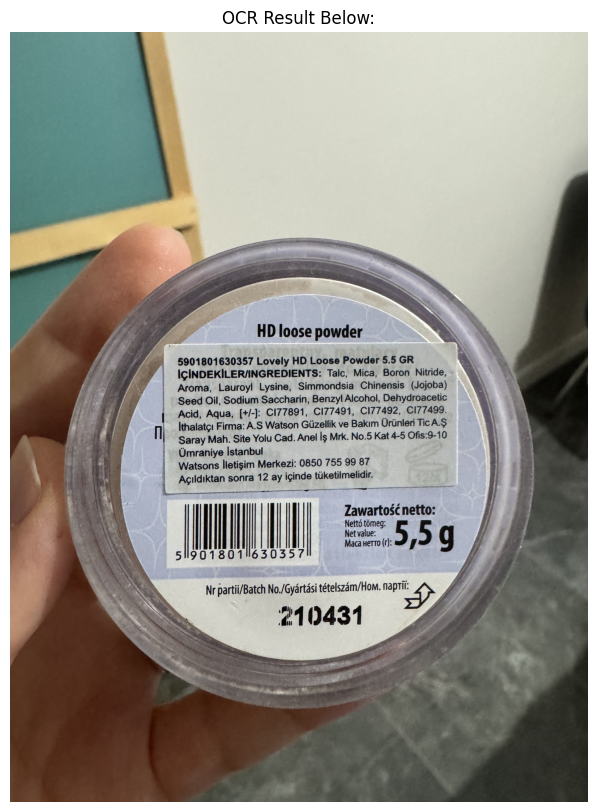

In [8]:
img = cv2.imread('/kaggle/input/ingredients/IMG_5963.jpeg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Perform OCR using EasyOCR
result = reader.readtext(img_rgb)

# Join OCR results into one string and clean it up
text = ' '.join([res[1] for res in result]).replace('\n', ' ')

text = text.lower()

# Try finding the target keyword 'içindekiler' after cleaning
start_idx = text.find('içindekiler')  
if start_idx != -1:
    ingredients_text = text[start_idx + len('içindekiler'):].strip()  
else:
    ingredients_text = "İçindekiler bölümü bulunamadı." 

print("OCR Result:")
print(ingredients_text)

plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('OCR Result Below:')
plt.xlabel(ingredients_text, fontsize=12, color='red', labelpad=10)  
plt.show()

### Why EasyOCR for OCR?
EasyOCR is a powerful, open-source Optical Character Recognition (OCR) library built with deep learning, making it highly effective for text recognition in a wide range of images. Here's why EasyOCR is an excellent choice:

* Multilingual Support: EasyOCR supports over 80 languages, making it versatile for projects requiring OCR on diverse datasets, including uncommon languages and scripts.

* Deep Learning-Based Accuracy: Leveraging state-of-the-art deep learning models, EasyOCR offers impressive accuracy for text extraction, even in challenging conditions such as noisy backgrounds or skewed text.

* Ease of Use: With an intuitive API and easy setup, EasyOCR enables fast deployment without the need for complex configurations. It's designed to work out-of-the-box with minimal setup.

* Optimized for Performance: EasyOCR provides options to accelerate text extraction, including GPU support for improved performance, which is crucial for processing large volumes of images.

**Key Role in the Code**

In this project, EasyOCR is employed to recognize and extract textual information from images, specifically to locate the "Ingredients" section on product labels. By utilizing its advanced deep learning models, it efficiently transforms image data into readable text, paving the way for further analysis and structuring.

<h2 style="color: #FF1493; text-align: center;">
  <b>PaddleOCR</b>
</h2>

In [ ]:
# !pip install paddlepaddle -i https://mirror.baidu.com/pypi/simple
# !pip install "paddleocr>=2.0.1"
# !pip install paddleocr
# !pip install paddlepaddle-gpu

In [10]:
from paddleocr import PaddleOCR

def setup_ocr():
    """
    Configures the PaddleOCR model. This function initializes the PaddleOCR object for OCR tasks.
    
    Args:
        None
        
    Returns:
        ocr (PaddleOCR): The PaddleOCR model instance
    """
    # Initialize PaddleOCR with angle classification (use_angle_cls), English language ('en'),
    ocr = PaddleOCR(
        use_angle_cls=True,  
        lang='en',           
        use_gpu=True        
    )
    return ocr

def process_single_image(image_path, ocr_model):
    """
    Processes a single image and extracts the 'ingredients' section from it.
    
    Args:
        image_path (str): Path to the image file
        ocr_model: The PaddleOCR model instance
    
    Returns:
        tuple: Processed image and extracted text
    """
    # Read the image from the given path. If unable to read, return an error message.
    img = cv2.imread(image_path)
    if img is None:
        return None, "Image could not be read"
    
    # Convert the image to RGB format as PaddleOCR requires RGB images
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Run the OCR model on the image to extract text (using angle classification as well)
    result = ocr_model.ocr(img, cls=True)  
    
    ingredients_found = False  # Flag to check if the 'ingredients' section is found
    ingredients_text = []  # List to store the text from the 'ingredients' section
    
    viz_img = img_rgb.copy()
    
    # Iterate over the OCR results (lines and words)
    for line in result:
        for word_info in line:
            bbox = word_info[0] 
            text = word_info[1][0]  
            confidence = word_info[1][1]  
            
            if 'ingredients' in text.lower():
                ingredients_found = True
                continue 
            
            # Once the 'ingredients' section is found and confidence is high, capture the words
            if ingredients_found and confidence > 0.5:
                ingredients_text.append(text)
                
                # Draw bounding boxes around detected words for visualization
                bbox = np.array(bbox).astype(np.int32)  
                cv2.polylines(viz_img, [bbox], True, (255, 0, 0), 2)  
    
    return viz_img, ' '.join(ingredients_text)

def display_results(image, text):
    """Visualizes the results by displaying the processed image and the extracted text"""
    plt.figure(figsize=(15, 10))  
    plt.imshow(image)  
    plt.axis('off')  
    plt.title('Detected Ingredients List')  
    plt.figtext(0.1, 0, f'Extracted Text:\n{text}', wrap=True, fontsize=10)  
    plt.show()  


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:16<00:00, 240.52it/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:18<00:00, 550.33it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:15<00:00, 138.83it/s]

[2024/12/29 18:26:21] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_ch

[2024/12/29 18:26:22] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
[2024/12/29 18:26:23] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
[2024/12/29 18:26:24] ppocr DEBUG: dt_boxes num : 28, elapsed : 0.34102773666381836
[2024/12/29 18:26:24] ppocr DEBUG: cls num  : 28, elapsed : 0.10559749603271484
[2024/12/29 18:26:25] ppocr DEBUG: rec_res num  : 28, elapsed : 0.2892894744873047


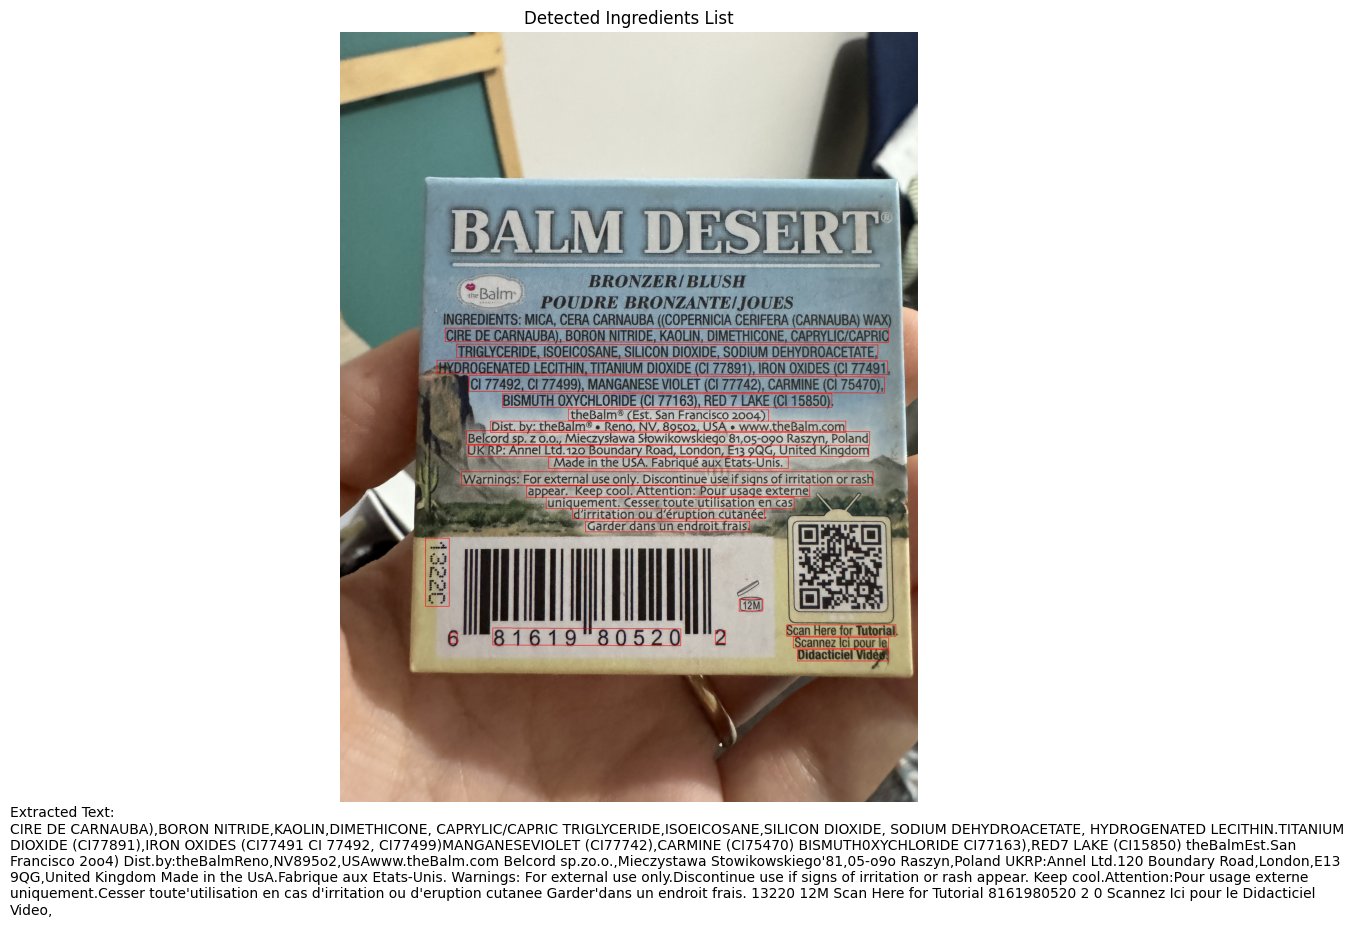

In [11]:
def main():
    """
    Main function to execute the OCR processing workflow. It sets up the OCR model,
    processes a single image to detect and extract ingredients, and then displays the results.
    """
    ocr_model = setup_ocr()
    
    image_path = '/kaggle/input/ingredients/IMG_5961.jpeg'  
    
    processed_image, ingredients_text = process_single_image(image_path, ocr_model)
    
    if processed_image is not None:
        display_results(processed_image, ingredients_text)  
    else:
        print("Image could not be processed!")  
if __name__ == "__main__":
    main()

### Why PaddleOCR for OCR?

PaddleOCR is an open-source Optical Character Recognition (OCR) tool developed by the PaddlePaddle team, designed to provide high accuracy and flexibility for a variety of OCR tasks. Here’s why PaddleOCR stands out:

* Comprehensive Language Support: PaddleOCR offers robust support for over 80 languages, including complex scripts and even vertical text, making it ideal for a wide range of OCR tasks in multiple languages.

* Deep Learning-Powered Accuracy: Leveraging deep learning algorithms, PaddleOCR delivers excellent recognition accuracy, even in noisy, blurred, or skewed text scenarios. Its models are optimized for both detection and recognition tasks.

* Easy Integration and Flexibility: PaddleOCR provides an easy-to-use API with quick setup. It integrates seamlessly with Python and can be tailored to specific use cases with its pre-trained models and customizable pipelines.

* Optimized for Performance: PaddleOCR excels in processing speed and offers GPU acceleration for rapid text extraction from large volumes of images, ensuring fast results even in production environments.

**Key Role in the Code**

In this project, PaddleOCR is used to extract textual content from images, particularly the "Ingredients" section on product labels. By using PaddleOCR’s advanced deep learning capabilities, the images are accurately converted into readable text, enabling further analysis and structuring of the data.

<h1 style="color: #FF69B4; text-align: center;">
  <b>Conclusion and Acknowledgements</b>
</h1>

This project successfully demonstrates the use of OCR technology to extract cosmetic product ingredient lists, aiding consumers in making informed decisions about product contents. By utilizing PyTesseract, EasyOCR, and PaddleOCR, we compared different OCR tools, enhancing text extraction accuracy through pre-processing techniques. This solution simplifies ingredient analysis and promotes transparency in the cosmetics industry.

I would like to thank the developers and communities behind PyTesseract, EasyOCR, and PaddleOCR for providing the tools that made this project possible. Also, I greatly appreciate the support and feedback from everyone involved. 

<h2 style="background-color: #F1F8FF; font-family: 'Segoe UI', sans-serif; font-size: 200%; color: #FF69B4; border-radius: 15px; padding: 20px; text-align: center;">
  <b>Wishing everyone a Happy New Year filled with success and new opportunities!
    May the new year bring joy, prosperity, and endless possibilities to you all!</b>
</h2>